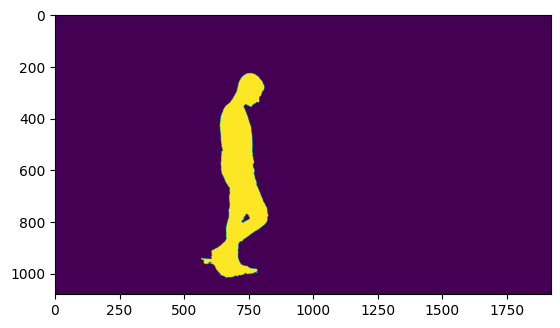

In [78]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

files = os.listdir('./test_dataset/masks/')
images = [cv2.imread('./test_dataset/masks/'+'/'+f, 0) for f in files]

plt.imshow(images[0])

In [90]:
def mass_center(img,is_round=True):
    Y = img.mean(axis=1)
    X = img.mean(axis=0)
    Y_ = np.sum(np.arange(Y.shape[0]) * Y)/np.sum(Y)
    X_ = np.sum(np.arange(X.shape[0]) * X)/np.sum(X)
    if is_round:
        return int(round(X_)),int(round(Y_))
    return X_,Y_

def image_extract(img,newsize):
    x_s = np.where(img.mean(axis=0)!=0)[0].min()
    x_e = np.where(img.mean(axis=0)!=0)[0].max()
    
    y_s = np.where(img.mean(axis=1)!=0)[0].min()
    y_e = np.where(img.mean(axis=1)!=0)[0].max()
    
    x_c,_ = mass_center(img)
    # x_c = (x_s+x_e)//2
    x_s = x_c-newsize[1]//2
    x_e = x_c+newsize[1]//2
    img = img[y_s:y_e,x_s if x_s>0 else 0:x_e if x_e<img.shape[1] else img.shape[1]]
    return cv2.resize(img,newsize)

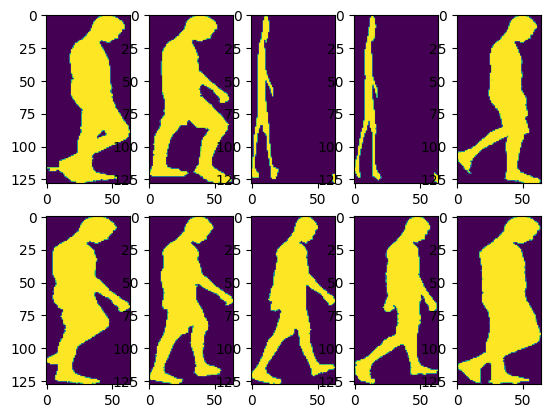

In [91]:
images = [image_extract(i,(64, 128)) for i in images]

plt.figure()
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(images[i])
plt.show()

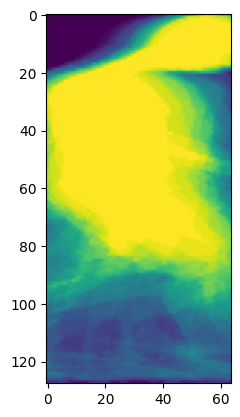

In [85]:
gei = np.mean(images,axis=0)

cv2.imwrite('./test_gei/'+id+'.png', gei)

plt.imshow(gei)
plt.show()

## Automated Script

In [49]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2


main = 'dataset/train/'
mains = []

for root, dirs, files in os.walk(main):
       for _dir in dirs:
        mains.append(_dir)

for j in range(4, len(mains)):
    path = main + mains[j]
    paths = []

    for root, dirs, files in os.walk(path):
        for _dir in dirs:
            paths.append(os.path.join(root, _dir))

    paths = paths[10:]

    def mass_center(img,is_round=True):
        Y = img.mean(axis=1)
        X = img.mean(axis=0)
        Y_ = np.sum(np.arange(Y.shape[0]) * Y)/np.sum(Y)
        X_ = np.sum(np.arange(X.shape[0]) * X)/np.sum(X)
        if is_round:
            return int(round(X_)),int(round(Y_))
        return X_,Y_

    def image_extract(img,newsize):
        if (len(np.where(img.mean(axis=0)!=0)[0]) != 0):
            x_s = np.where(img.mean(axis=0)!=0)[0].min()
            x_e = np.where(img.mean(axis=0)!=0)[0].max()
            
            y_s = np.where(img.mean(axis=1)!=0)[0].min()
            y_e = np.where(img.mean(axis=1)!=0)[0].max()
            
            x_c,_ = mass_center(img)
            # x_c = (x_s+x_e)//2
            x_s = x_c-newsize[1]//2
            x_e = x_c+newsize[1]//2
            img = img[y_s:y_e,x_s if x_s>0 else 0:x_e if x_e<img.shape[1] else img.shape[1]]
            return cv2.resize(img,newsize)
        else:
            return 0

    os.mkdir('./gei/' + mains[j])
    for i in range(len(paths)):
        files = os.listdir(paths[i])
        images = [cv2.imread(paths[i]+'/'+f, 0) for f in files]
        image_data = []
        for k in images:
            item = image_extract(k,(64, 128))
            # print(item)
            if(np.max(item) != 0):
                image_data.append(item)
        # images = [image_extract(i,(64, 128)) for i in images]
        gei = np.mean(image_data,axis=0)
        id = paths[i].split('/')[-1].replace('\\', '_')
        cv2.imwrite('./gei/'+ mains[j] + '/' + id +'.png', gei)
    
    print(j)

c:\Users\h4rip\anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\h4rip\anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134


FileExistsError: [WinError 183] Cannot create a file when that file already exists: './gei/018'